# Image classification with a neural network (pytorch)

In this notebook we propose to classify images using neural networks. 

## Your work:

If you are not familiar with data classification using pytorch, you can start with the tutorial 1a.

Here we will apply classification to images. The dataset we consider here is MNIST. It is composed of images of size $28\times28$

Based on the course, the classification example and pytorch documentation you will use the notebook and do the following:
### part I
We will first consider Fully-Connected architecture.
1. Implement a simple NN with one hidden layer of 128 neurons and `ReLU` activations. (Fill the notebook below)
2. Display the loss function evolution on a validation set on the same curve as the one from the training set. Is there overfitting?
3. Modify the program to reduce the number of training images to 1000, using a Subset of the dataset, and train the model again. Observe the resulting performance. What can you conclude?

### part II
We now want to implement a CNN with the following architecture:
* a convolutional layer with `ReLU` activations, with 32 kernels of $5\times 5$ receptive fields
* a max pooling layer $2 \times 2$ (stride $2 \times 2$)
* a convolutional layer with `ReLU` activations, with 64 kernels of $5\times 5$ receptive fields
* a max pooling $2 \times 2$ (stride $2 \times 2$).
* a fully connected layer of 1024 neurons (activation ReLU)
* the output layer

All convolutional layers have a padding `SAME`

4. Represent the architecture of this network on paper first, and indicate the tensors dimensions at each step
5. How many parameters does this network possess?
6. Implement this network. What performance do you get?
7. Observe the influence of hyper-parameters on the final accuracy


### Imports python

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
%matplotlib inline

#Import pytorch:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset, random_split
import torchvision
import torchvision.transforms as transforms


## 1. Data loading and visualization

Let's start with data preparation. We get the data from torchvision and normalize them. They are already separated into a training set and a test set.

shape X train :  torch.Size([60000, 28, 28])
shape X test :  torch.Size([10000, 28, 28])
shape Y train :  torch.Size([60000])
shape Y test :  torch.Size([10000])


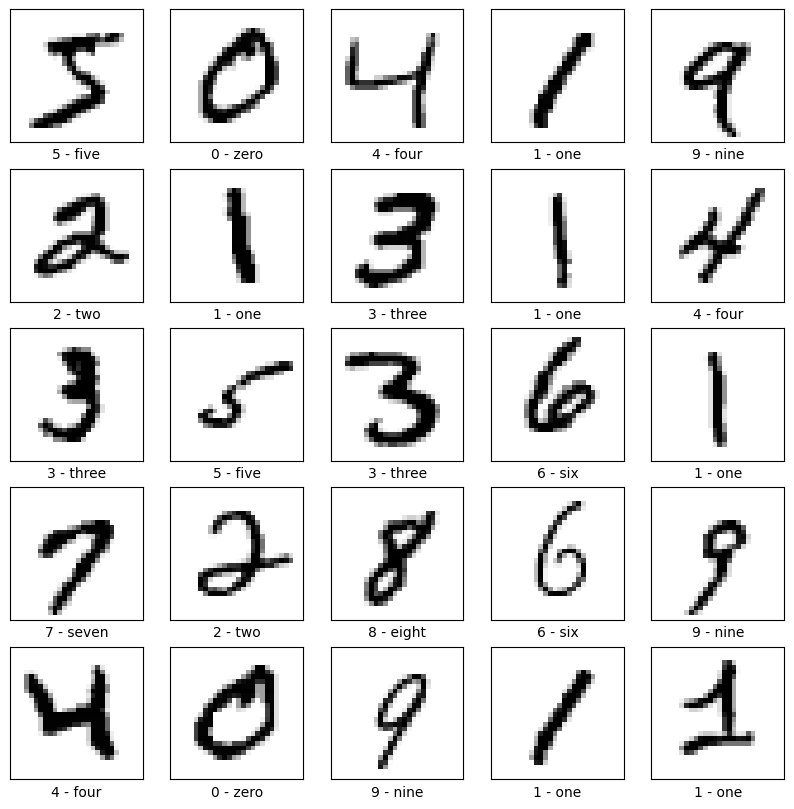

In [2]:
# Normalization from [0,255] to [0,1] 
transform = transforms.Compose([transforms.ToTensor()])

# Dataset
mnistTrainData = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnistTestSet = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

X_train = mnistTrainData.data/255.
X_test = mnistTestSet.data/255.
Y_train = mnistTrainData.targets
Y_test = mnistTestSet.targets
class_names = mnistTrainData.classes

print('shape X train : ', X_train.shape)
print('shape X test : ', X_test.shape)
print('shape Y train : ', Y_train.shape)
print('shape Y test : ', Y_test.shape)

# Display some images and corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])

## 2. Building a Model



### Model and predictions

We define a specific class of neural network here. The ```forward``` function applies the model on data to get the output predictions.

In [3]:
# Hyperparameters
# Choose here the nomber of neurons in the hidden layer:
H = 128

# Network Class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(28*28, H),
            nn.ReLU(),
            nn.Linear(H, 10) # 10 digits
        )
                   
    def forward(self, x):
        x = x.reshape(-1,28*28)
        x = self.fc(x)
        return x
    
# For reproducible results (optional)  
torch.manual_seed(0)

# Network creation 
model = Net()

# Display the architecture:
print(model)

Net(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


## 3. Training

### Prepare for training


In [4]:
# Hyperparameters
N_epochs = 5
batch_size = 100
learning_rate = 0.002

#### Loss function definition
https://pytorch.org/docs/master/nn.html#loss-functions

In [5]:
loss_function = nn.CrossEntropyLoss()

#### Optimizer definition
https://pytorch.org/docs/master/optim.html#algorithms

In [6]:
# Optimizer:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### Dataloader preparation

We will separate our data in a training, validation, and test set and creat 3 dataloaders

In [7]:
# Split test Dataset
n_val = 1000 #Number of validation samples
mnistValSet, mnistTrainSet = random_split(mnistTrainData, [n_val, len(mnistTrainData)-n_val])

# (use the Subsets below to try with less training samples)
#n_train = 1000 #Number of training examples 
#mnistTrainSubset, _ = random_split(mnistTrainSet, [n_train, len(mnistTrainSet)-n_train])


# Dataloaders
mnistTrainLoader = DataLoader(mnistTrainSet, batch_size=batch_size,shuffle=True, num_workers=0)
mnistValLoader = DataLoader(mnistValSet, batch_size=1000, shuffle=False, num_workers=0)
mnistTestLoader = DataLoader(mnistTestSet, batch_size=batch_size, shuffle=False, num_workers=0)

for features_val, labels_val in mnistValLoader: 
    print(features_val)
    print(labels_val)
    print(model(features_val))
    

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

### Network training


In [18]:
losses = []  
val_losses = []
i=0
for epoch in range(N_epochs):  # Loop over epochs
    running_loss = 0.0
   
    for features, labels in mnistTrainLoader:   
        #Forward Propagation
        labels_pred = model(features) # 

        #Loss computation
        print(np.shape(labels_pred))
        loss = loss_function(labels_pred,labels)

        #Save loss for later display
        losses.append(loss.item())
        
        
        labels_val_pred = model(features_val)
        val_loss = loss_function(labels_val_pred,labels_val)
        val_losses.append(val_loss.item())

        #Erase previous gradient values
        optimizer.zero_grad()

        #Compute gradient by backpropagation
        loss.backward()

        #Weight update
        optimizer.step()     

        
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    
            print('[Epoque : %d, iteration: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
        i+=1        
   
print('Training done')

torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([100, 10])
torch.Size

KeyboardInterrupt: 

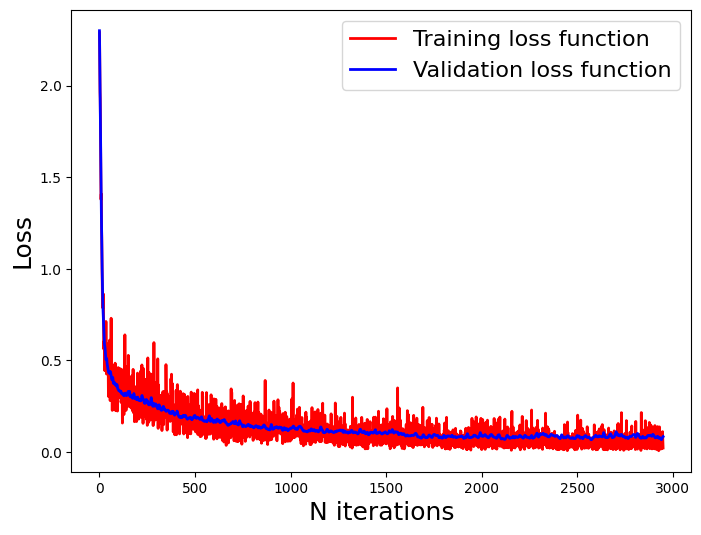

In [9]:
# Display loss evolution
fig, axes = plt.subplots(figsize=(8,6))
axes.plot(losses,'r-',lw=2,label='Training loss function')
axes.plot(val_losses,'b-',lw=2,label='Validation loss function')
axes.set_xlabel('N iterations',fontsize=18)
axes.set_ylabel('Loss',fontsize=18)
plt.legend(loc='upper right',fontsize=16)

## 5. Performances evaluation

In [10]:
# Accuracy
def accuracy(model,dataloader):
    correct = 0
    total = 0
    # No need to compute gradients here
    with torch.no_grad():
        for images, labels in dataloader:
            # Forward propagation to get predictions
            outputs = model(images)         
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100.0 * correct / total       

print('Train Accuracy : %.2f %%' % (accuracy(model,mnistTrainLoader)))   
print('Test Accuracy : %.2f %%' % (accuracy(model,mnistTestLoader)))                                                         


Train Accuracy : 98.68 %
Test Accuracy : 97.44 %


## 6. Predictions

In [11]:
predictions = model(X_test.type(torch.FloatTensor))
print('shape predictions : ', predictions.shape)


shape predictions :  torch.Size([10000, 10])


C:\Users\Pierre\AppData\Local\Temp\ipykernel_9284\986084380.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions_array, true_label, img = F.softmax(predictions_array[i]), true_label[i], img[i]
C:\Users\Pierre\AppData\Local\Temp\ipykernel_9284\986084380.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions_array, true_label = F.softmax(predictions_array[i]), true_label[i]


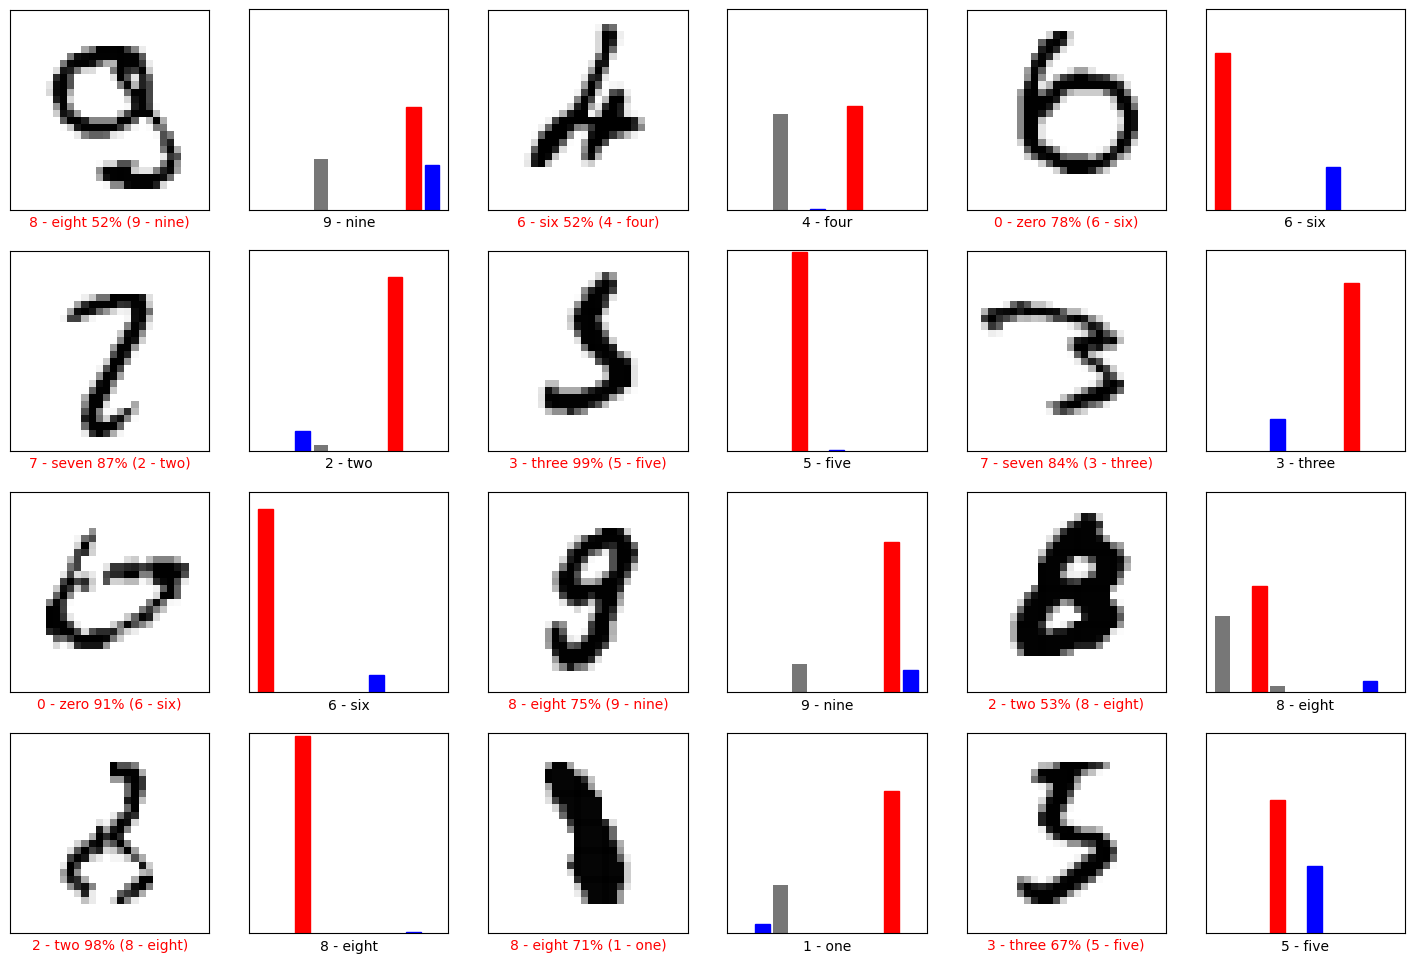

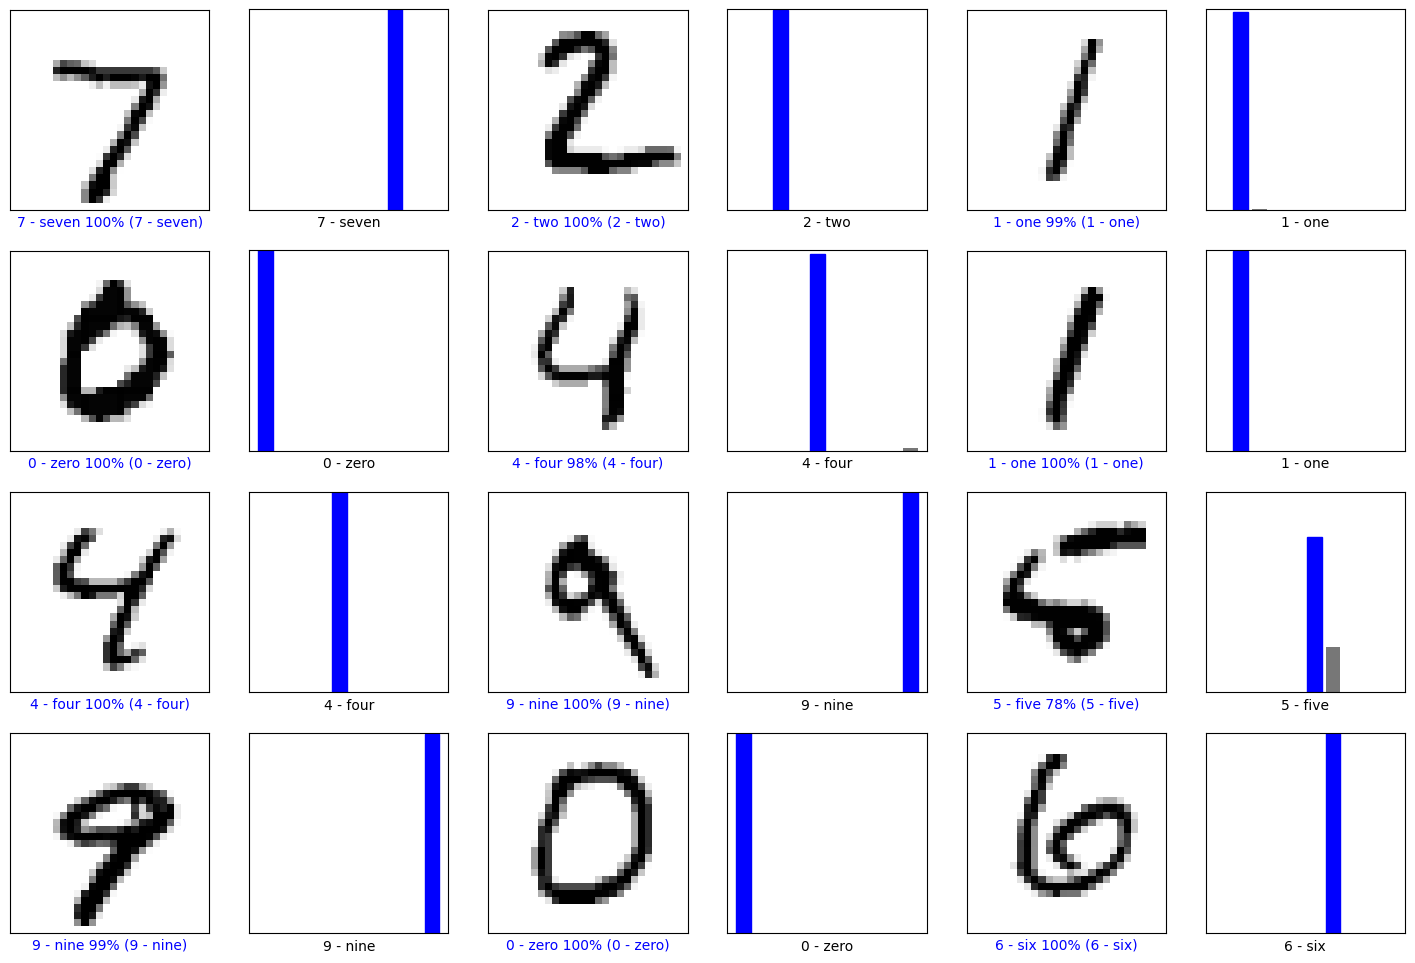

In [12]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = F.softmax(predictions_array[i]), true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])  
    plt.imshow(img, cmap=plt.cm.binary)  
    predicted_label = torch.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*torch.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = F.softmax(predictions_array[i]), true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array.detach(), color="#777777")
    plt.ylim([0, 1])
    predicted_label = torch.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# Display a few images and their predictions 
_, predicted = torch.max(predictions.data, 1)
labels = Y_test
correct = (predicted == labels)
false = (predicted != labels)
    
# Display a few error cases
idx_false = np.where(false)
plt.figure(figsize=(18,12))
K=0
for i in idx_false[0][0:12]:  
    plt.subplot(4,6,2*K+1)
    plot_image(i, predictions, Y_test, X_test)
    plt.subplot(4,6,2*K+2)
    plot_value_array(i, predictions,  Y_test)
    plt.xlabel(class_names[Y_test[i]])
    K=K+1
plt.show()


# Display a few correct predictions
idx_correct = np.where(correct)
plt.figure(figsize=(18,12))
K=0
for i in idx_correct[0][0:12]:  
    plt.subplot(4,6,2*K+1)
    plot_image(i, predictions, Y_test, X_test)
    plt.subplot(4,6,2*K+2)
    plot_value_array(i, predictions,  Y_test)
    plt.xlabel(class_names[Y_test[i]])
    K=K+1
plt.show()

## Saving for tomorrow

In [13]:
torch.save(model.state_dict(), "../MNIST_classification.pt")